In [3]:


import numpy as np


def conv2(img, conv_filter):
    # flip the filter
    f_siz_1, f_size_2 = conv_filter.shape
    conv_filter = conv_filter[range(f_siz_1 - 1, -1, -1), :][:, range(f_siz_1 - 1, -1, -1)]
    pad = (conv_filter.shape[0] - 1) // 2
    result = np.zeros((img.shape))
    img = np.pad(img, ((pad, pad), (pad, pad)), 'constant', constant_values=(0, 0))
    filter_size = conv_filter.shape[0]
    for r in np.arange(img.shape[0] - filter_size + 1):
        for c in np.arange(img.shape[1] - filter_size + 1):
            curr_region = img[r:r + filter_size, c:c + filter_size]
            curr_result = curr_region * conv_filter
            conv_sum = np.sum(curr_result)  # Summing the result of multiplication.
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.

    return result


def fspecial(shape=(3, 3), sigma=0.5):
    m, n = [(ss - 1.) / 2. for ss in shape]
    y, x = np.ogrid[-m:m + 1, -n:n + 1]
    h = np.exp(-(x * x + y * y) / (2. * sigma * sigma))
    h[h < np.finfo(h.dtype).eps * h.max()] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h


# Parameters, add more if needed
sigma = 2
thresh = 0.01

# Derivative masks
dx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
dy = dx.transpose()

import matplotlib.pyplot as plt
import cv2

bw = cv2.imread('Harris-1.jpg')
height, width, channels = bw.shape
print("Height:", height)
print("Width:", width)
print("Channels:", channels)
def init_setting(bw, comp):
    bw = cv2.cvtColor(bw, cv2.COLOR_BGR2GRAY)
    bw = np.array(bw * 255, dtype=int)
    # computer x and y derivatives of image
    Ix = conv2(bw, dx)
    Iy = conv2(bw, dy)

    g = fspecial((max(1, np.floor(3 * sigma) * 2 + 1), max(1, np.floor(3 * sigma) * 2 + 1)), sigma)
    # g is the Gaussian filter we use to denoise the picture

    Iy2 = conv2(np.power(Iy, 2), g)
    Ix2 = conv2(np.power(Ix, 2), g)
    Ixy = conv2(Ix * Iy, g)
    if comp == "Ix":
        return Ix
    elif comp == "Iy":
        return Iy
    elif comp == "g":
        return g
    elif comp == "Iy2":
        return Iy2
    elif comp == "Ix2":
        return Ix2
    elif comp == "Ixy":
        return Ixy
    else: 
        return False


Height: 370
Width: 492
Channels: 3


In [4]:


######################################################################
# Task: Compute the Harris Cornerness
def cornerness(Ix2, Iy2, Ixy, k, size, result):
    '''
    Cornerness returns a list of corners which has R-value greater than threshold.
    '''
    # constant assignment 
    row = len(Ix2)
    col = len(Ix2[0])
    trace = Ix2 + Iy2
    det = Ix2 * Iy2
    R = det - k * trace ** 2
    corner = []
    Ix2_sum = 0
    Iy2_sum = 0
    Ixy_sum = 0
    Ix2_lst = []
    Iy2_lst = []
    Ixy_lst = []
    temp_Ix2 = []
    temp_Iy2 = []
    temp_Ixy = []
    corner = []
    half_size = size//2
    for i in range(half_size, row - half_size):
        for j in range(half_size, col - half_size):
            for m in range(i - half_size, i + half_size):
                for n in range(j - half_size, j + half_size):
                    # Compute the sum of Ix2, Iy2, Ixy within the window
                    Ix2_sum += Ix2[m][n]
                    Iy2_sum += Iy2[m][n]
                    Ixy_sum += Ixy[m][n]
            temp_Ix2 += [Ix2_sum]
            temp_Iy2 += [Iy2_sum]
            temp_Ixy += [Ixy_sum]
            R_temp = (Ix2_sum * Iy2_sum - Ixy_sum ** 2) - k * (Ix2_sum + Iy2_sum) ** 2 
            # R_temp is the R value for each pixel
            if R_temp > 5000000: #threshold can be changed
                corner += [[i, j]]
                # filter out the pixels with R-values greater than the threshold
            Ix2_sum = 0
            Iy2_sum = 0
            Ixy_sum = 0
        Ix2_lst += [temp_Ix2]
        Iy2_lst += [temp_Iy2]
        Ixy_lst += [temp_Ixy]
        temp_Ix2 = []
        temp_Iy2 = []
        temp_Ixy = []
        
    Ix2_lst = np.array(Ix2_lst)
    Iy2_lst = np.array(Iy2_lst)
    Ixy_lst = np.array(Ixy_lst)
    R = (Ix2_lst * Iy2_lst - Ixy_lst ** 2) - k * (Ix2_lst + Iy2_lst) ** 2
    if result == "corner":
        #returns a list of corner taht  have R values greater than the thershold
        return corner
    else:
        print(len(R))
        print(len(R[0]))
        # returns a list of R values for each pixel 
        return R

bw = cv2.imread('Harris-1.jpg')
Ix2 = init_setting(bw, "Ix2")
Iy2 = init_setting(bw, "Iy2")
Ixy = init_setting(bw, "Ixy")
cornerness(Ix2, Iy2, Ixy, 0.01, 5, "corner")

######################################################################


[[2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 12],
 [2, 13],
 [2, 14],
 [2, 15],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [2, 20],
 [2, 21],
 [2, 22],
 [2, 77],
 [2, 78],
 [2, 79],
 [2, 80],
 [2, 81],
 [2, 82],
 [2, 83],
 [2, 86],
 [2, 87],
 [2, 88],
 [2, 89],
 [2, 90],
 [2, 272],
 [2, 273],
 [2, 274],
 [2, 275],
 [2, 276],
 [2, 277],
 [2, 278],
 [2, 279],
 [2, 280],
 [2, 281],
 [2, 282],
 [2, 283],
 [2, 284],
 [2, 285],
 [2, 320],
 [2, 321],
 [2, 322],
 [2, 323],
 [2, 324],
 [2, 325],
 [2, 326],
 [2, 327],
 [2, 328],
 [2, 329],
 [2, 330],
 [2, 331],
 [2, 332],
 [2, 459],
 [2, 460],
 [2, 461],
 [2, 462],
 [2, 463],
 [2, 464],
 [2, 465],
 [2, 466],
 [2, 467],
 [2, 468],
 [2, 469],
 [2, 470],
 [2, 471],
 [2, 472],
 [2, 473],
 [2, 474],
 [2, 475],
 [2, 476],
 [2, 477],
 [2, 478],
 [2, 479],
 [2, 480],
 [2, 488],
 [2, 489],
 [3, 2],
 [3, 3],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 12],
 [3, 13],
 [3, 14],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [3, 20],
 [3, 21],
 

In [5]:
def sup_thr(Ix2, Iy2, Ixy, k):
    '''
    sup_thr performs the non-maximal suppresion and returns a list of corners
    '''
    #definition, assignment
    trace = Ix2 + Iy2
    det = Ix2 * Iy2
    R = det - k * trace ** 2
    init_corner = cornerness(Ix2, Iy2, Ixy, k, 5, "corner")
    R = cornerness(Ix2, Iy2, Ixy, k, 5, "R")
    row_R = len(R)
    col_R = len(R[0])
    print(row_R)
    print(col_R)
    leng = len(init_corner)
    temp = []
    new_corner = []
    for m in init_corner:
        i = m[0]
        j = m[1]  #i,j: coordinates of corners
        if j >= col_R - 1:
            continue
        if i >= row_R - 1:
            continue
        if j == 0:
            continue
        if i == 0:
            continue
        if ((R[i][j] > R[i-1][j+1]) &
             (R[i][j] > R[i][j+1]) &
              (R[i][j] > R[i+1][j+1]) &
               (R[i][j] > R[i-1][j]) &
                (R[i][j] > R[i+1][j]) &
                 (R[i][j] > R[i-1][j-1]) &
                  (R[i][j] > R[i][j-1]) &
                   (R[i][j] > R[i+1][j-1])):
            # Comparison of R[i][j] with its 8 neighbouring pixels, if R[i][j] is not the maximum, it gets removed from the original corner list
            new_corner +=[[i,j]]
        else:
            continue
    
    return new_corner
              
                    

sup_thr(Ix2, Iy2, Ixy, 0.1)


######################################################################

366
488
366
488


[[5, 78],
 [6, 39],
 [6, 420],
 [6, 463],
 [11, 435],
 [15, 273],
 [15, 326],
 [15, 414],
 [16, 432],
 [18, 75],
 [18, 89],
 [19, 17],
 [19, 37],
 [19, 51],
 [30, 444],
 [30, 457],
 [34, 471],
 [38, 13],
 [61, 263],
 [61, 276],
 [61, 316],
 [61, 330],
 [61, 348],
 [62, 170],
 [62, 223],
 [62, 382],
 [62, 399],
 [62, 434],
 [62, 451],
 [62, 455],
 [62, 472],
 [63, 118],
 [63, 135],
 [63, 139],
 [63, 156],
 [64, 83],
 [64, 104],
 [65, 33],
 [65, 53],
 [65, 67],
 [66, 17],
 [67, 225],
 [68, 208],
 [69, 176],
 [69, 192],
 [69, 196],
 [69, 241],
 [69, 244],
 [69, 289],
 [69, 293],
 [74, 303],
 [75, 183],
 [77, 344],
 [77, 365],
 [77, 396],
 [77, 417],
 [77, 447],
 [77, 468],
 [78, 101],
 [78, 132],
 [78, 153],
 [79, 80],
 [80, 30],
 [80, 51],
 [83, 206],
 [83, 240],
 [83, 246],
 [83, 257],
 [83, 288],
 [83, 294],
 [83, 303],
 [86, 183],
 [86, 189],
 [91, 365],
 [92, 344],
 [92, 396],
 [92, 417],
 [93, 446],
 [93, 467],
 [94, 132],
 [94, 153],
 [95, 303],
 [96, 29],
 [96, 50],
 [96, 206],
 [

366
488
366
488
[[5, 78], [6, 39], [6, 420], [6, 463], [11, 435], [15, 273], [15, 326], [15, 414], [16, 432], [18, 75], [18, 89], [19, 17], [19, 37], [19, 51], [30, 444], [30, 457], [34, 471], [38, 13], [61, 263], [61, 276], [61, 316], [61, 330], [61, 348], [62, 170], [62, 223], [62, 382], [62, 399], [62, 434], [62, 451], [62, 455], [62, 472], [63, 118], [63, 135], [63, 139], [63, 156], [64, 83], [64, 104], [65, 33], [65, 53], [65, 67], [66, 17], [67, 225], [68, 208], [69, 176], [69, 192], [69, 196], [69, 241], [69, 244], [69, 289], [69, 293], [74, 303], [75, 183], [77, 344], [77, 365], [77, 396], [77, 417], [77, 447], [77, 468], [78, 101], [78, 132], [78, 153], [79, 80], [80, 30], [80, 51], [83, 206], [83, 240], [83, 246], [83, 257], [83, 288], [83, 294], [83, 303], [86, 183], [86, 189], [91, 365], [92, 344], [92, 396], [92, 417], [93, 446], [93, 467], [94, 132], [94, 153], [95, 303], [96, 29], [96, 50], [96, 206], [96, 238], [96, 258], [96, 288], [96, 294], [105, 306], [106, 182], [1

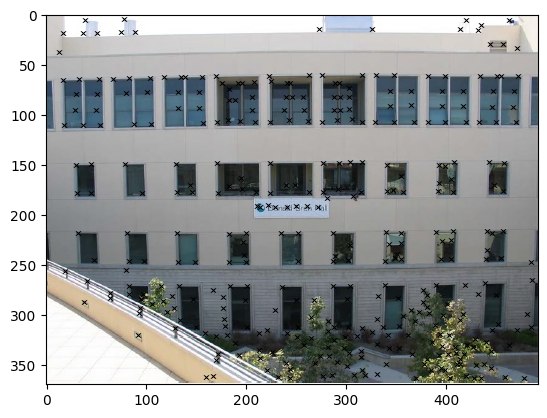

In [6]:
def Harris_corner_detection(img):
    '''
    Harris_corner_detection is a wrapper function for harris corner detection 
    with thresholding and non-max suppresion
    '''
    #values assignment
    Ix2 = init_setting(img, "Ix2")
    Iy2 = init_setting(img, "Iy2")
    Ixy = init_setting(img, "Ixy")
    corner_lst = sup_thr(Ix2, Iy2, Ixy, 0.1)
    print(corner_lst)
    leng = len(corner_lst)
    for i in range(leng):
        #marking the deteceted corners
        cv2.drawMarker(img, (corner_lst[i][1], corner_lst[i][0]), color=[0, 0, 0], thickness=1, 
                       markerType= cv2.MARKER_TILTED_CROSS, line_type=cv2.LINE_AA,
                       markerSize=5)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

img = cv2.imread('Harris-1.jpg')
Harris_corner_detection(img)

#ref: https://www.tutorialspoint.com/drawing-a-cross-on-an-image-with-opencv

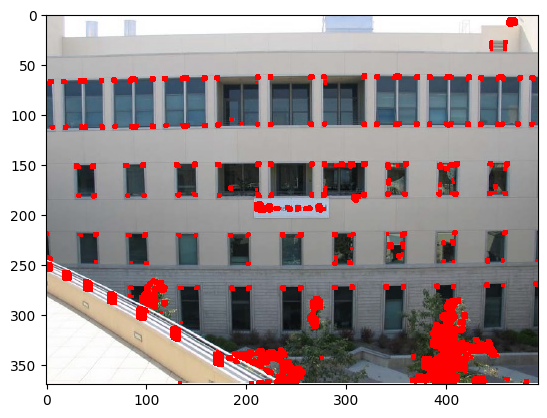

In [13]:
#Q4

#Harris-1.jpg
img = cv2.imread("Harris-1.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.float32(img2) 
img2 = cv2.cornerHarris(img2, 5, 3, 0.01)


img2 = cv2.dilate(img2, None)
img[img2 > 0.01 * img2.max()]=[0, 0, 255] 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

#Ref: https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/

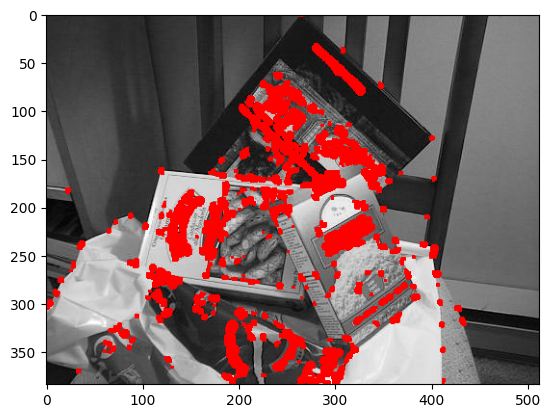

In [ ]:
#Harris-2.jpg
img = cv2.imread("Harris-2.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.float32(img2) 
img2 = cv2.cornerHarris(img2, 5, 3, 0.01)

img2 = cv2.dilate(img2, None)
img[img2 > 0.01 * img2.max()]=[0, 0, 255] 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

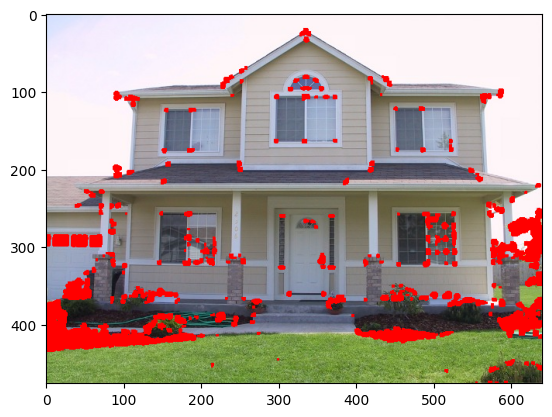

In [ ]:
#Harris-3.jpg
img = cv2.imread("Harris-3.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.float32(img2) 
img2 = cv2.cornerHarris(img2, 5, 3, 0.01)

img2 = cv2.dilate(img2, None)
img[img2 > 0.01 * img2.max()]=[0, 0, 255] 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


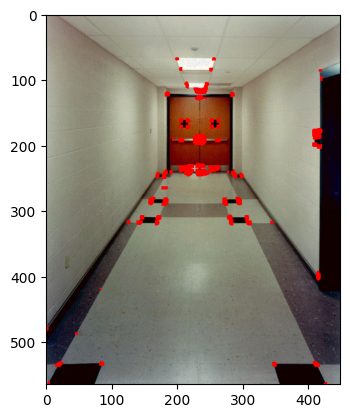

In [ ]:

#Harris-4.jpg
img = cv2.imread("Harris-4.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = np.float32(img2) 
img2 = cv2.cornerHarris(img2, 5, 3, 0.01)

img2 = cv2.dilate(img2, None)
img[img2 > 0.01 * img2.max()]=[0, 0, 255] 

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
def bil_intp(x, y, img):
    '''
    bil_intp takes the coordinate of a pixel and computes for its interpolated value
    Requires: x, y != int
    '''
    assert(np.floor(x) != x)
    assert(np.ceil(x) != x)
    assert(np.floor(y) != y)
    assert(np.ceil(y) != y)
    # assignment
    p11 = [int(np.floor(x)), int(np.floor(y))]
    p12 = [int(np.floor(x)), int(np.ceil(y))]
    p21 = [int(np.ceil(x)), int(np.floor(y))]
    p22 = [int(np.ceil(x)), int(np.ceil(y))]
    x1 = np.floor(x)
    x2 = np.ceil(x)
    y1 = np.floor(y)
    y2 = np.ceil(y)
    #bilinear interpolation formula
    val = ((x2-x)*img[p11[0], p11[1]] + (x-x1)*img[p21[0], p21[1]]) * (y2-y) + ((x2-x)*img[p12[0], p12[1]] + (x-x1)*img[p22[0], p22[1]]) * (y-y1)
    return val 
    
#test
img = cv2.imread("Harris-4.jpg")
bil_intp(2.3, 4.1, img)




array([137.22, 147.12, 157.42])

In [ ]:

def linear_intp(x, y, img):
    '''
    linear_intp takes the coordinate of a pixel and computes for its linearly interpolated value
    Requires: !((x == int) & (y == int))
    '''
    assert(not((isinstance(y, int) == True) & (isinstance(x, int) == True)))
    #assignment
    if (isinstance(y, int) == True):
        p1 = [int(np.floor(x)), y]
        p2 = [int(np.ceil(x)), y]
        x1 = int(np.floor(x))
        x2 = int(np.ceil(x))
        i = x
    elif (isinstance(x, int) == True):
        p1 = [x, int(np.floor(y))]
        p2 = [x, int(np.ceil(y))]
        x1 = int(np.floor(y))
        x2 = int(np.ceil(y))
        i = y
    #linear intp formula
    val = img[p1[0], p1[1]]*((x2-i)/(x2-x1)) + img[p2[0], p2[1]]*((i-x1)/(x2-x1))
    return val

#test
img = cv2.imread("Harris-4.jpg")
linear_intp(2, 1.2, img)

array([148., 159., 167.])

(370, 492, 3)


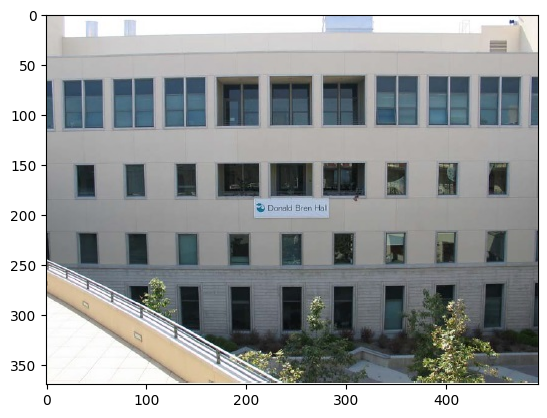

In [ ]:
def inv_mapping (img, mat, output_row, output_col):
    '''
    inv_mapping returns an image with transformation using inverse mapping 
    '''
    new_img = np.full((output_row, output_col, 3), 255, dtype=np.uint8)
    for i in range(output_row):
        for j in range(output_col):
            #inverse mapping formula
            corr_x = mat[0][0] * i + mat[0][1] * j 
            corr_y = mat[1][0] * i + mat[1][1] * j 
            if (isinstance(corr_x, int) == True) & (isinstance(corr_y, int) == True):
                #the corresponding coordinates are integers in img
                new_img[i, j] = img[corr_x, corr_y]
            elif (isinstance(corr_x, int) == True) | (isinstance(corr_y, int) == True):
                #one of the corresponding coordinates (x or y) is integer in img, while the other is not, linear interpolation is used 
                new_img[i, j] = linear_intp(corr_x, corr_y, img)
            else:
                #none of the corresponding coordinates (x and y) is integer in img, bilinear interpilation is used
                new_img[i, j] = bil_intp(corr_x, corr_y, img)
                
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)
    new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)
    return new_img
                
img = cv2.imread("Harris-1.jpg")
print(img.shape)
img_0deg_cw = inv_mapping (img, [[1, 0], [0, 1]], 370, 492) #0 deg cw

366
488
366
488
[[5, 78], [6, 39], [6, 420], [6, 463], [11, 435], [15, 273], [15, 326], [15, 414], [16, 432], [18, 75], [18, 89], [19, 17], [19, 37], [19, 51], [30, 444], [30, 457], [34, 471], [38, 13], [61, 263], [61, 276], [61, 316], [61, 330], [61, 348], [62, 170], [62, 223], [62, 382], [62, 399], [62, 434], [62, 451], [62, 455], [62, 472], [63, 118], [63, 135], [63, 139], [63, 156], [64, 83], [64, 104], [65, 33], [65, 53], [65, 67], [66, 17], [67, 225], [68, 208], [69, 176], [69, 192], [69, 196], [69, 241], [69, 244], [69, 289], [69, 293], [74, 303], [75, 183], [77, 344], [77, 365], [77, 396], [77, 417], [77, 447], [77, 468], [78, 101], [78, 132], [78, 153], [79, 80], [80, 30], [80, 51], [83, 206], [83, 240], [83, 246], [83, 257], [83, 288], [83, 294], [83, 303], [86, 183], [86, 189], [91, 365], [92, 344], [92, 396], [92, 417], [93, 446], [93, 467], [94, 132], [94, 153], [95, 303], [96, 29], [96, 50], [96, 206], [96, 238], [96, 258], [96, 288], [96, 294], [105, 306], [106, 182], [1

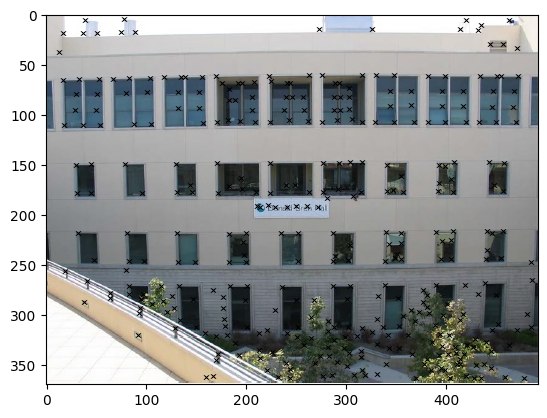

In [ ]:
Harris_corner_detection(img_0deg_cw) #Harris corner detection for image after 0 deg cw warping

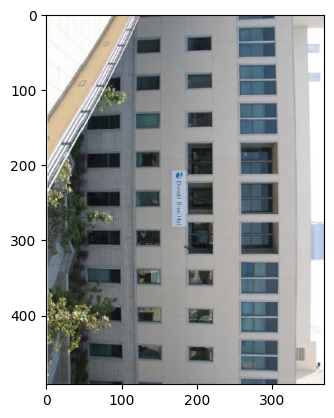

In [ ]:
img_90deg_cw = inv_mapping (img, [[0, -1], [1, 0]], 492, 370) #90 deg cw

488
366
488
366
[[17, 301], [17, 348], [18, 256], [19, 110], [29, 271], [30, 216], [30, 287], [31, 188], [32, 148], [33, 302], [34, 121], [37, 256], [37, 348], [38, 79], [39, 361], [41, 100], [45, 217], [47, 148], [48, 121], [48, 360], [50, 271], [51, 287], [51, 348], [53, 302], [64, 83], [64, 88], [67, 257], [67, 302], [70, 14], [75, 349], [78, 362], [79, 217], [80, 111], [80, 188], [80, 288], [81, 148], [83, 95], [83, 120], [83, 303], [86, 361], [88, 257], [89, 349], [92, 46], [93, 68], [94, 73], [94, 217], [96, 188], [97, 87], [97, 148], [98, 120], [99, 17], [101, 289], [104, 303], [105, 257], [115, 95], [117, 80], [118, 258], [118, 304], [126, 85], [127, 109], [128, 73], [129, 53], [130, 217], [131, 148], [131, 189], [132, 119], [132, 273], [132, 289], [133, 95], [135, 304], [139, 258], [144, 196], [146, 189], [146, 218], [147, 82], [148, 148], [149, 95], [149, 119], [153, 273], [153, 289], [156, 304], [157, 258], [167, 91], [170, 21], [170, 305], [171, 218], [171, 259], [172, 27],

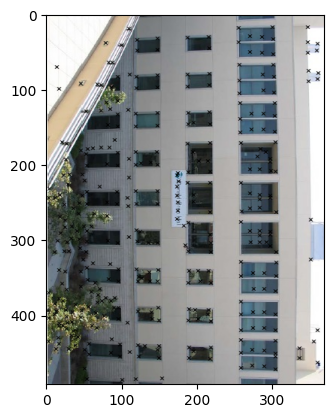

In [ ]:
Harris_corner_detection(img_90deg_cw) #Harris corner detection for image after 90 deg cw warping

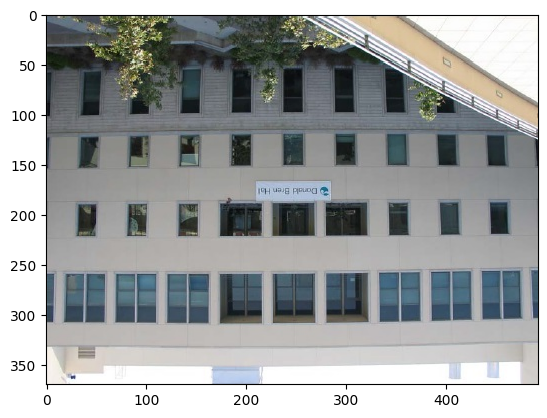

In [ ]:
img_180deg_cw = inv_mapping (img, [[-1, 0], [0, -1]], 370, 492) #180 deg cw

366
488
366
488
[[2, 95], [2, 370], [3, 85], [3, 245], [4, 257], [11, 90], [11, 104], [11, 173], [11, 268], [12, 245], [13, 44], [13, 94], [15, 188], [16, 59], [17, 51], [17, 75], [17, 78], [17, 111], [17, 390], [18, 220], [18, 249], [19, 198], [21, 131], [21, 319], [22, 75], [22, 108], [23, 275], [24, 174], [24, 236], [25, 147], [25, 206], [25, 215], [25, 307], [26, 96], [26, 296], [27, 71], [27, 87], [27, 123], [27, 317], [28, 79], [28, 186], [28, 409], [29, 263], [30, 44], [30, 174], [31, 276], [33, 191], [34, 62], [34, 80], [34, 207], [35, 93], [35, 304], [36, 68], [36, 231], [39, 49], [39, 103], [41, 201], [42, 60], [43, 224], [44, 190], [44, 238], [45, 178], [45, 319], [46, 86], [46, 127], [46, 147], [46, 308], [46, 397], [47, 95], [48, 248], [48, 276], [49, 163], [50, 207], [51, 18], [51, 43], [51, 268], [53, 173], [53, 303], [53, 360], [54, 152], [54, 187], [54, 201], [54, 237], [54, 253], [54, 288], [54, 339], [55, 136], [55, 310], [56, 100], [57, 37], [57, 51], [59, 332], [60

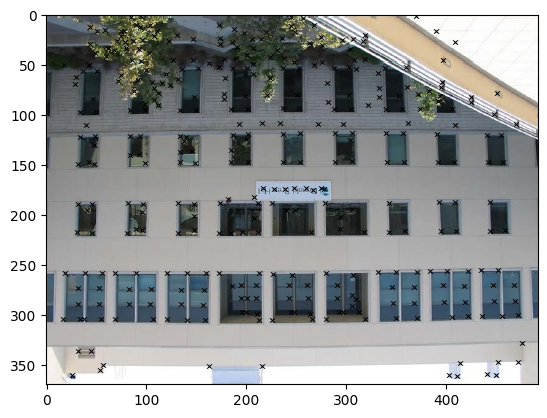

In [ ]:
Harris_corner_detection(img_180deg_cw) #Harris corner detection for image after 180 deg cw warping

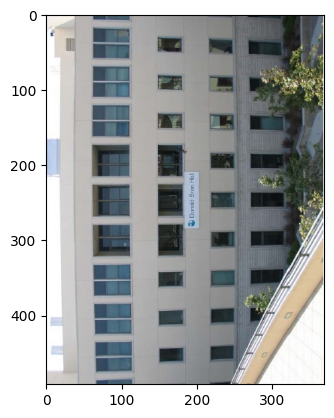

In [ ]:
img_270deg_cw = inv_mapping (img, [[0, 1], [-1, 0]], 492, 370) #270 deg cw

488
366
488
366
[[11, 364], [17, 62], [18, 34], [19, 108], [26, 6], [26, 331], [29, 297], [30, 304], [30, 363], [31, 149], [32, 30], [32, 77], [32, 93], [32, 177], [32, 217], [34, 62], [34, 269], [37, 310], [38, 62], [39, 108], [41, 171], [44, 337], [44, 354], [45, 30], [46, 148], [46, 177], [47, 282], [48, 236], [49, 245], [49, 328], [51, 310], [51, 350], [53, 77], [53, 93], [54, 364], [56, 108], [57, 16], [59, 351], [60, 325], [61, 364], [62, 333], [68, 331], [69, 6], [69, 62], [69, 108], [69, 362], [70, 271], [71, 340], [72, 300], [75, 15], [75, 306], [75, 345], [75, 350], [78, 350], [79, 339], [80, 333], [81, 148], [82, 178], [82, 217], [83, 77], [83, 92], [84, 226], [84, 245], [84, 271], [85, 364], [86, 321], [87, 340], [88, 290], [90, 62], [90, 108], [90, 152], [90, 356], [92, 301], [93, 332], [94, 245], [94, 354], [95, 320], [96, 151], [96, 169], [96, 341], [97, 177], [99, 277], [100, 311], [103, 328], [104, 77], [104, 356], [105, 92], [106, 299], [107, 62], [107, 108], [108, 28

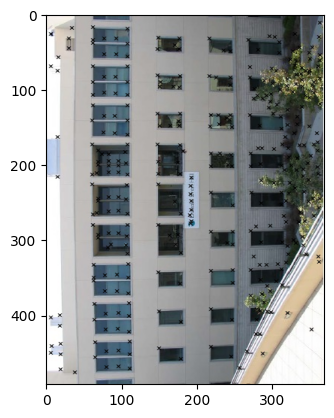

In [ ]:
Harris_corner_detection(img_270deg_cw) #Harris corner detection for image after 270 deg cw warping

508
508
508
508
[]


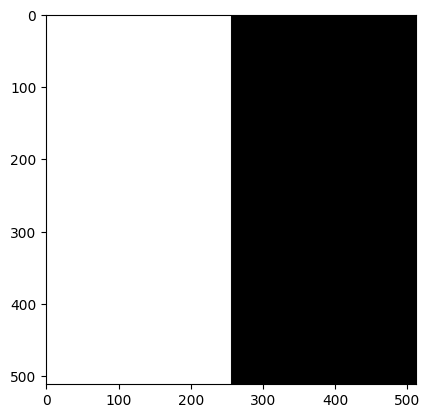

In [ ]:
img5 = cv2.imread("Harris-5.jpg")
Harris_corner_detection(img5) 

488
366
488
366
[]


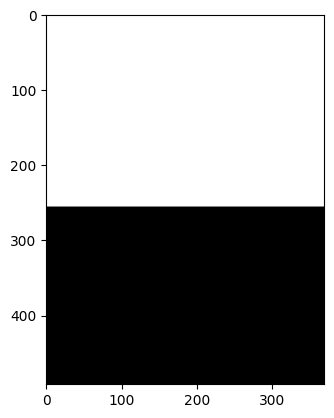

In [ ]:
img5_90deg_cw = inv_mapping (img5, [[0, -1], [1, 0]], 492, 370) #90 deg cw
Harris_corner_detection(img5_90deg_cw) #Harris corner detection for image after 90 deg cw warping

508
508
508
508
[[2, 263], [2, 282], [2, 410], [2, 499], [3, 462], [5, 409], [7, 326], [7, 352], [7, 417], [7, 446], [9, 279], [10, 269], [10, 371], [10, 426], [10, 454], [10, 476], [10, 495], [11, 358], [12, 488], [13, 319], [14, 443], [15, 257], [16, 290], [17, 377], [17, 411], [17, 471], [18, 270], [19, 361], [19, 417], [19, 433], [20, 386], [20, 407], [20, 425], [22, 336], [22, 348], [23, 294], [23, 303], [23, 493], [24, 257], [24, 286], [24, 368], [26, 311], [26, 448], [26, 459], [26, 482], [28, 276], [28, 427], [28, 440], [29, 358], [30, 385], [30, 401], [32, 268], [32, 314], [32, 350], [32, 470], [32, 506], [33, 286], [33, 341], [35, 323], [35, 332], [35, 369], [35, 484], [35, 495], [36, 298], [36, 426], [36, 441], [39, 353], [40, 451], [41, 387], [43, 292], [43, 489], [44, 268], [44, 374], [44, 433], [44, 445], [45, 474], [47, 308], [47, 339], [48, 360], [48, 438], [49, 403], [49, 427], [49, 463], [50, 452], [50, 482], [51, 323], [51, 330], [52, 396], [52, 475], [54, 257], [54,

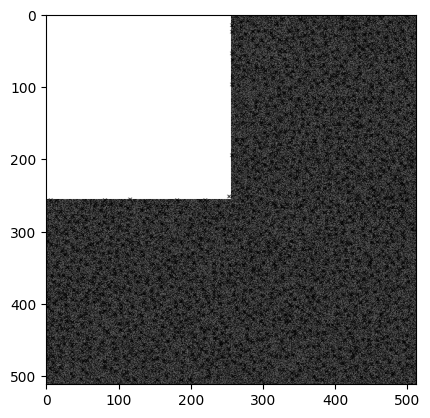

In [ ]:
img6 = cv2.imread("Harris-6.jpg")
Harris_corner_detection(img6) 